# Testing My Neural Network on MNIST Handwritten Digits

 ### 1. Importing

In [1]:
import numpy as np
import my_NN as nn
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

2025-07-10 00:06:21.496616: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 2. Processing Data

In [2]:
# load MNIST datset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 28 * 28).astype("float32") / 255.0
X_test = X_test.reshape(-1, 28 * 28).astype("float32") / 255.0

# Convert to list of column vectors
X_train = [x.reshape(-1, 1) for x in X_train]
X_test = [x.reshape(-1, 1) for x in X_test]

In [3]:
# convert outputs from digit value to vector form
def vector_convert(digit, num_digits=10):
    vec = np.zeros((num_digits, 1))
    vec[digit] = 1
    return vec

y_train = [vector_convert(y) for y in y_train]
y_test = [vector_convert(y) for y in y_test]

In [4]:
def accuracy(X_batch, y_batch, model):
    correct = 0
    for X, y in zip(X_batch, y_batch):
        output = model.forward(X)
        prediction = np.argmax(output)
        answer = np.argmax(y)
        if prediction == answer:
            correct += 1
    return correct / len(X_batch)

### 3. Initializing Neural Network

In [5]:
NN = nn.Neural_Network(n_inputs=784, # each pixel
                       n_outputs=10, # number of digits
                       hidden_layers=2, 
                       hidden_size=64,
                       hidden_activation=nn.ReLU(), 
                       output_activation=nn.Softmax(), # digit probabilities
                       learning_rate=0.03)

In [6]:
# pre test
loss_data = []
acc_data = []

loss = NN.test(X_test, y_test)
acc = accuracy(X_test, y_test, NN)
print(f'Epoch: 0, Loss: {loss:.4f}, Accuracy: {acc:.4f}')

# start recording loss and accuracy
loss_data.append(loss)
acc_data.append(acc)

Epoch: 0, Loss: 2.3028, Accuracy: 0.0982


### 4. Training and Testing Neural Network

In [7]:
# Train the neural network
batch_size = 32
epochs = 20
for epoch in range(epochs):
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i: i + batch_size]
        y_batch = y_train[i: i + batch_size]

        NN.train(X_batch, y_batch)

    # test the neural network after each epoch training
    loss = NN.test(X_test, y_test)
    acc = accuracy(X_test, y_test, NN)
    # print and record loss and accuracy
    loss_data.append(loss)
    acc_data.append(acc)
    print(f'Epoch: {epoch+1}, Loss: {loss:.4f}, Accuracy: {acc:.4f}')

Epoch: 1, Loss: 0.8999, Accuracy: 0.6976
Epoch: 2, Loss: 0.4068, Accuracy: 0.8763
Epoch: 3, Loss: 0.2876, Accuracy: 0.9113
Epoch: 4, Loss: 0.2279, Accuracy: 0.9296
Epoch: 5, Loss: 0.1918, Accuracy: 0.9409
Epoch: 6, Loss: 0.1647, Accuracy: 0.9499
Epoch: 7, Loss: 0.1509, Accuracy: 0.9536
Epoch: 8, Loss: 0.1362, Accuracy: 0.9589
Epoch: 9, Loss: 0.1253, Accuracy: 0.9632
Epoch: 10, Loss: 0.1188, Accuracy: 0.9657
Epoch: 11, Loss: 0.1123, Accuracy: 0.9673
Epoch: 12, Loss: 0.1091, Accuracy: 0.9682
Epoch: 13, Loss: 0.1053, Accuracy: 0.9687
Epoch: 14, Loss: 0.1037, Accuracy: 0.9694
Epoch: 15, Loss: 0.1030, Accuracy: 0.9697
Epoch: 16, Loss: 0.1027, Accuracy: 0.9705
Epoch: 17, Loss: 0.1021, Accuracy: 0.9707
Epoch: 18, Loss: 0.1013, Accuracy: 0.9710
Epoch: 19, Loss: 0.1009, Accuracy: 0.9712
Epoch: 20, Loss: 0.1010, Accuracy: 0.9714


### 5. Plotting and Discussing Results

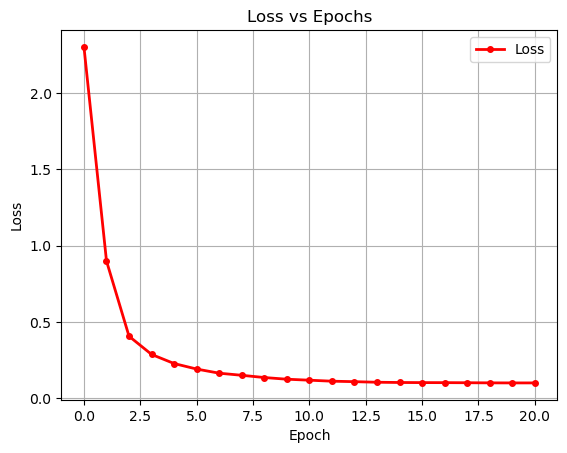

In [8]:
fig1, ax1 = plt.subplots()

ax1.plot(range(epochs+1), loss_data,
         color='red',         # Line color
         linestyle='-',       # '-', '--', '-.', ':'
         linewidth=2,         # Thickness
         marker='o',          # Marker at points
         markersize=4,        # Size of markers
         label='Loss')      # Label for legend

ax1.set_title("Loss vs Epochs")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
ax1.grid(True)
plt.show()

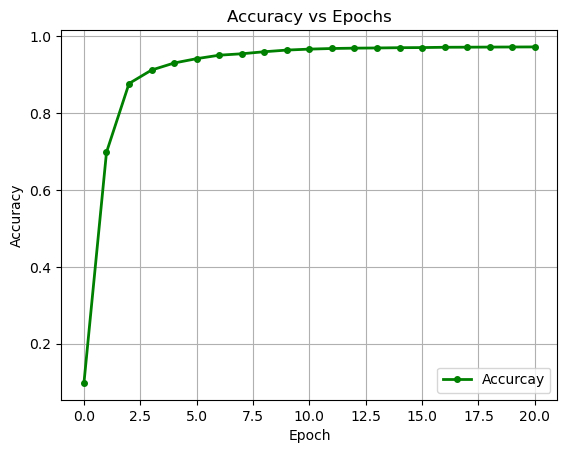

In [9]:
fig2, ax2 = plt.subplots()

ax2.plot(range(epochs+1), acc_data,
         color='green',         # Line color
         linestyle='-',       # '-', '--', '-.', ':'
         linewidth=2,         # Thickness
         marker='o',          # Marker at points
         markersize=4,        # Size of markers
         label='Accurcay')      # Label for legend

ax2.set_title("Accuracy vs Epochs")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.legend()
ax2.grid(True)
plt.show()

#### Discussion
My home made Neural Network (NN) from scratch was successful. The NN model was trained on MNIST handwritten digit data and it reached an accuracy score of **97.14%**. This means it correctly guesses the handwritten digit 97.14% of the time. The model also produced a minimum loss of **0.1010**.  

The hyper parameter optimization process was not documented, but did have interesting results. For example, the model used 2 hidden layers as 1 layer only produced about $\approx$ 90% accuracy while 3 or more layers got stuck at 11.38% accuracy. I speculate that the deeper NN's required more fine tuned intial weights and biases to avoid getting stuck at the local minimum they were hitting. Other hyper paramters include 32 batch size, 20 epochs, 64 layer size, 0.03 learning rate, and ReLU hidden activation. Some of these parameters were chosen to balance performance and realistic time constraints. I did not want the training process to exceed about 5 minutes.  

Overall, the model using my homemade NN implementation performed well and can successfully classify MNIST handrwitten digits.